# Урок 1. Алгоритм линейной регрессии. Градиентный спуск.

УРОК


In [105]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                    'xtick.labelsize': 14})

In [106]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],  # для умножения на intersept
             [1, 1, 2, 1, 3, 0, 5, 10, 1, 2 ]]).T  # стаж репетитора
X.shape

(10, 2)

In [107]:
X

array([[ 1,  1],
       [ 1,  1],
       [ 1,  2],
       [ 1,  1],
       [ 1,  3],
       [ 1,  0],
       [ 1,  5],
       [ 1, 10],
       [ 1,  1],
       [ 1,  2]])

In [108]:
# Средний бал ЕГЭ (целевая переменная)
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]


Text(0, 0.5, 'Средний бал ЕГЭ')

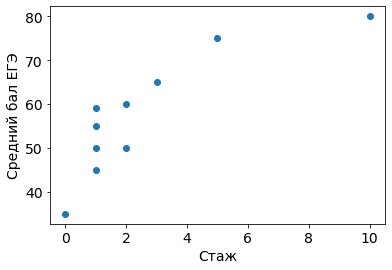

In [109]:
plt.scatter(X[:,1], y)
plt.xlabel('Стаж')
plt.ylabel('Средний бал ЕГЭ')

Text(0, 0.5, 'Средний бал ЕГЭ')

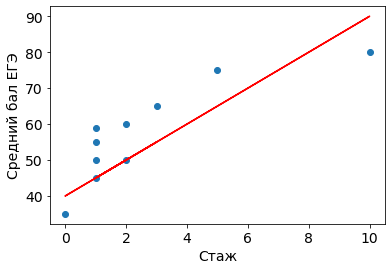

In [110]:
# y = m * x + b
m = 5  #-slope, наклон прямой,тангенс(3.91071429)
b = 40 #-intercept точка пересечения прямой с вертикальной осью(47.23214286)
plt.scatter(X[:,1], y)
plt.plot(X[:,1], m * X[:,1] + b, color = 'red')
plt.xlabel('Стаж')
plt.ylabel('Средний бал ЕГЭ')


In [111]:
y_pred1 = 40 + 5 * X[:,1]
y_pred2 = 40 + 7 * X[:,1]

In [112]:
y_pred1

array([45, 45, 50, 45, 55, 40, 65, 90, 45, 50])

In [113]:
y_pred2

array([ 47,  47,  54,  47,  61,  40,  75, 110,  47,  54])

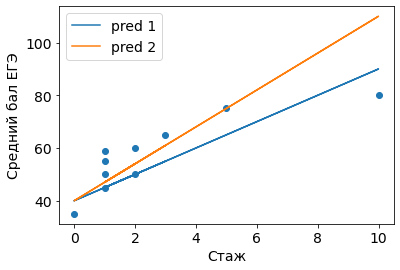

In [114]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], y_pred1, label = 'pred 1')
plt.plot(X[:,1], y_pred2, label = 'pred 2')
plt.xlabel('Стаж')
plt.ylabel('Средний бал ЕГЭ')
plt.legend()

# метрики

In [115]:
# Оценка точности алгоритма по метрикам
err1 = np.mean(y - y_pred1)
err2 = np.mean(y - y_pred2)
err1, err2

(4.4, -0.8)

In [116]:
#Средняя аболютная ошибка
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))
mae_1, mae_2

(7.4, 7.4)

In [117]:
# Средняя квадратичная ошибка
mse_1 = np.mean((y - y_pred1) ** 2)
mse_2 = np.mean((y - y_pred2) ** 2)
mse_1, mse_2

(74.6, 121.4)

# метод наименьших квадратов


In [118]:
#массив
X

array([[ 1,  1],
       [ 1,  1],
       [ 1,  2],
       [ 1,  1],
       [ 1,  3],
       [ 1,  0],
       [ 1,  5],
       [ 1, 10],
       [ 1,  1],
       [ 1,  2]])

In [119]:
# транспонированный массив
X.T

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  1,  3,  0,  5, 10,  1,  2]])

In [120]:
# Скалярное произведение транспонированного массива на массив
X.T @ X

array([[ 10,  26],
       [ 26, 146]])

In [121]:
#Когда много признаков (МНК)

# веса по методу наименьших квадратов МНК(вектор наклона intercept=47.23214286, sloup= 3.91071429)
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([47.23214286,  3.91071429])

In [122]:
#Сравнение только для одного признака

w1 = np.sum((y - np.mean(y)) * (X[:,1] - X[:,1].mean())) / np.sum((X[:,1] - X[:,1].mean()) ** 2)
w0 = np.mean(y) - w1 * X[:,1].mean()
w0, w1

(47.23214285714286, 3.910714285714285)

In [123]:
# Способы перемножения массива признаков и вектор весов

w_ = [40, 5]
print(X @ w_)
print(np.dot(w_, X.T))
print(np.dot(X, w_))
print(w_[0] * X[:, 0] + w_[1] * X[:,1])
print(np.sum(w_ * X, axis=1))

[45 45 50 45 55 40 65 90 45 50]
[45 45 50 45 55 40 65 90 45 50]
[45 45 50 45 55 40 65 90 45 50]
[45 45 50 45 55 40 65 90 45 50]
[45 45 50 45 55 40 65 90 45 50]


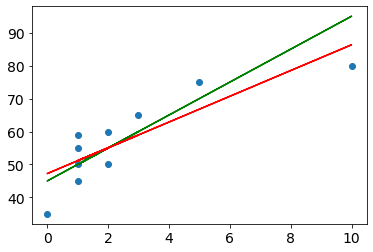

In [124]:
#Визуализация

plt.scatter(X[:,1], y)
plt.plot(X[:,1], 45 + X[:,1] * 5, color = 'g')
#plt.plot(X[:,1], 40 + X[:,1] * 7, color = 'b')
plt.plot(X[:,1], w[0] + w[1] * X[:,1], color = 'r')

# Функции метрик

In [125]:
# Средняя квадратичная ошибка
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [126]:
# Средняя абсолютная ошибка
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [127]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(7.4, 74.6)

In [128]:
# Ошибка методом наименьших квадратов
y_pred3 = w[0] + w[1] * X[:,1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [129]:
# Наилучший способ
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(6.182142857142858, 45.93749999999999)

# ГРАДИЕНТНЫЙ СПУСК

In [130]:
n = 10  # количество объектов
alpha = 1e-3  # шаг
w = np.array([1, 0.5])  # начальные веса, точка отчета
grad = 1/n * 2 * np.sum(X.T * (np.sum(w * X, axis=1) - y), axis=1)
grad = 1/n * 2 * np.dot(X.T, (np.dot(w,X.T) - y))
#grad
w, w - alpha * grad

(array([1. , 0.5]), array([1.1102, 0.84  ]))

# домашнее задание

Проведите небольшое исследование алгоритма градиентного спуска. Оцените влияние значений скорости обучения (alpha) и количества итераций на ошибку алгоритма. Как связаны эти два гиперпараметра между собой? Подберите скорость обучения и количество итераций до совпадения ответов алгоритма с результатами МНК. Как можно ускорить процесс вычисления весов?
(*) В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:
w = np.array([1, 0.5])
for i in range(1001):
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    w -= (alpha * (1/n * 2 * np.sum(X.T * (y_pred - y)))) # ошибка!
    if i % 100 == 0:
        print(i, w, err)
3(*). Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога. Сколько нужно сделать итераций, если установить допустимое отклонение mse в размере diff=1e-6, а значение alpha=1e-2?

In [135]:
n = X.shape[0]
alpha = 1e-2
w = np.array([1, 0.5])

for i in range(1500):
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    for j in range(w.shape[0]):
        w[j] -= alpha * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
    if i % 100 == 0:
        print(i, w, err)  # МНК:array(47.23214286,  3.91071429)

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001848
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666764
400 [46.56511152  4.03388672] 46.18175564810758
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758049
800 [47.2219474   3.91259695] 45.937557064435396
900 [47.228558    3.91137626] 45.937507054979434
1000 [47.23088237  3.91094704] 45.937500872219886
1100 [47.23169965  3.91079613] 45.937500107834126
1200 [47.23198702  3.91074306] 45.93750001333172
1300 [47.23208806  3.9107244 ] 45.93750000164824
1400 [47.23212359  3.91071784] 45.93750000020376


In [133]:
# Избавляемся от итераций по весам

w = np.array([1, 0.5])
for i in range(1001):
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    #w -= (alpha * (1/n * 2 * np.sum(X.T * (y_pred - y)))) # ошибка!
    w -= (alpha * (1/n * 2 * np.dot((y_pred - y), X)))
    if i % 100 == 0:
        print(i, w, err)

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001848
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666764
400 [46.56511152  4.03388672] 46.18175564810758
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758049
800 [47.2219474   3.91259695] 45.937557064435396
900 [47.228558    3.91137626] 45.937507054979434
1000 [47.23088237  3.91094704] 45.937500872219886


In [134]:
n = X.shape[0]
n

10

## 0. Основные понятия и обозначения

В предыдущих курсах студенты уже знакомились с признаковыми описаниями, основными алгоритмами машинного обучения и Python-библиотеками, используемыми для решения задач в этой области. Однако, перед началом изучения программы курса давайте повторим основные понятия и обозначения, используемые в машинном обучении.

Машинное обучение - дисциплина, заключаящаяся в извлечении знаний из известных данных. Машинное обучение - это раздел математики, поэтому в нем мы будем, помимо всего прочего, работать с формулами.

_Объект_ - то, для чего нужно сделать предсказание. Например, в задаче распознавания спам-почты объектом будет являться письмо. Объекты обозначаются буквой $x$. Множество всех объектов, для которых может потребоваться сделать предсказания, называется _пространством объектов_ и обозначается $\mathbb{X}$.

_Ответ_ - то, что нужно предсказать. В том же примере распознавания спама ответом будет является информация о том, является письмо спамом или нет. Ответы обозначаются буквой $y$ (можно сказать, что $y = y(x)$, так как ответ зависит от объекта). _Пространство ответов_ - множество всех ответов, с которыми мы можем работать. Оно обозначается $\mathbb{Y}$. В примере задачи распознавания спама оно состоит из двух элементов: $+1$ и $-1$ (означающие, что письмо является и не является спамом, соответственно).

Для реализации машинного обучения компьютеру нужно "объяснить" объекты, которые в первоначальном виде он понять не может, с помощью сущностей, ему понятных, например, чисел. Для этого вводится понятие _признаков_. Признак - это некая числовая характеристика объекта. Совокупность всех признаков объекта $x = (x^{1}, x^{2},..., x^{d})$ называется его _признаковым описанием_. Оно является $d$-мерным вектором, то есть к нему можно применять все операции, описанные линейной алгеброй.

Множество значений $i$-го признака будем обозначать $D_{i}$. Существует множество различных видов признаков:

- _Бинарные признаки_ принимают два значения: $D_{i} = \{0,1\}$. Примером  в задаче кредитного скоринга может служить ответ, выше ли доход клиента определенной установленной суммы. При положительном ответе признак полагается равным 1, при отрицательном - 0.

- _Вещественные признаки_ могут принимать в качестве значений все вещественные числа: $D_{i} = \mathbb{R}$. Примерами могут выступать возраст человека, заработная плата, количество звонков в колл-центр в месяц и т.д.

- _Категориальные признаки_ - это такие признаки, значения которых можно сравнивать только на равенство, и нельзя на "больше-меньше". В этом случае $D_{i}$ - неупорядоченное множетсво. Примерами таких признаков могут выступать город, в котором родился клиент банка, или его образование.

- _Порядковые признаки_ - частный случай категоиральных признаков. В этом случае $D_{i}$ - упорядоченное множество. Признаки можно сравнивать между собой, но нельзя определить расстояние между ними. Например, то же образование, но с введенным осмысленным порядком (высшее образование больше среднего профессионального, которое в свою очередь больше среднего и т.д.)

- _Множествозначные признаки_ - признаки, значения которых на объекте являются подмножеством некоторого множества. Например, в задачах анализа текстов таким признаком является множество слов, которые входят в текст. Оно является подмножеством большого словаря.

В первой части нашего курса мы рассмотрим алгоритмы _обучения с учителем_ или _контролироемого обучения (supervised learning)_. Данный метод заключается в восстановлении общей закономерности по конечному числу известных примеров.

Центральным понятием машинного обучения является _обучающая выборка_. Это примеры, на основе которых мы планируем строить общую закономерность. Она обозначается $X$ и состоит из $l$ пар объектов $x_{i}$ и известных ответов $y_{i}$:

$$X = (x^{i}, y_{i})^l_{i=1}.$$

Функция, отображающая пространство объектов $\mathbb{X}$ в пространство ответов $\mathbb{Y}$, помогающая нам делать предсказания, называется _алгоритмом_ или _моделью_ и обозначается $a(x)$. Она принимает на вход объект и выдает ответ.

В нашем примере распознавания спама такой моделью может являться линейный алгоритм (сумма всех признаков с некоторыми коэффициентами, также называемыми весами, $w_{i}$ c прибавлением константного коэффициента $w_{0}$):

$$a(x) = sign(w_{0} + w_{1}x^{1}+w_{2}x^{2}+...+w_{d}x^{d}).$$

Признаками в ней могут выступать наличие определенных слов в письме, наличие отправителя в адресной книге получателя, дата и время отправления, наличие фишинговых url и т.д. Операция взятия знака от этого выражения берется так как в примере распознавания спама пространство ответов состоит всего из двух элементов, как говорилось ранее.

Для решения определенной задачи не все алгоритмы одинаково хорошо подходят. Для определения наиболее подходящего алгоритма введена характеристика, называемая _функционалом ошибки_ $Q(a, X)$. Он принимает на вход алгоритм и выборку и сообщает, насколько хорошо данный алгоритм работает на данной выборке. В примере распознавания спам-писем в качестве такого функционала может выступать доля неправильных ответов (предсказаний). Задача обучения заключается в подборе такого алгоритма, при котором достигается минимум функционала ошибки $Q(a, X)\rightarrow min.$

Наиболее подходящий алгоритм при этом выбирается из множества, называемого _семейством алгоритмов_ $\mathbb{A}$. Их мы будем рассматривать в данном курсе.

## 1. Линейная регрессия. MSE

В предыдущем разделе мы упоминали линейные модели - это такие модели, которые сводятся к суммированию значений признаков с некоторыми весами. Само название модели говорит о том, что зависимость предсказываемой переменной от признаков будет линейной:
 
$$a(x) = w_{0}+\sum^{d}_{i=1}w_{i}x^{i}.$$
 
В данном случае парамертрами моделей являются веса $w_{i}$. Вес $w_{0}$ называется _свободным коэффициентом_ или _сдвигом_. Оптимизация модели в таком случае заключается в подборе оптимальных значений весов. Сумму в формуле также можно описать как скалярное произведение вектора признаков $x=(x^{1},...,x^{d})$ на вектор весов $w=(w_{1},...,w_{d})$:
 
$$a(x) = w_{0}+\left \langle w,x \right \rangle.$$
 
Обратим внимание, что сдвиг делает модель неоднородной и затрудняет ее дальнейшую оптимизацию. Для устранения этого фактора обычно используют прием, позволяющий упростить запись: к признаковому описанию объекта добавляется еще один признак (константный), на каждом объекте равный единице. В этом случае вес при нем как раз будет по смыслу совпадать со свободным коэффициентом, и сам $w_{0}$ будет не нужен. Тогда получим
 
$$a(x) = \sum^{d+1}_{i=1}w_{i}x^{i}=\left \langle w,x \right \rangle.$$
 
За счет простой формы линейные модели достаточно легко обучются и позволяют работать с зашумленными данными, небольшими выборками, контролирауя при этом риск переобучения.

Для обучения модели необходимо иметь возможность измерять точность линейного алгоритма на выборке (обучающей или тестовой). 

В качестве меры ошибки можно взять абсолютное отклонение истинного значения от прогноза $Q(a,y)=a(x)-y$, но тогда минимизация функционала ошибки (в которой и состоит задача обучения) будет достигаться при принятии им отрицательного значения. Например, если истинное значение ответа равно $10$, а алгоритм $a(x)$ выдает ответ $11$, отклонение будет равно $1$, а при значении предсказания равном $1$, отклонение будет равно $1-10=-9$. Значение ошибки во втором случае ниже, однако разница истинного значения и предсказания нашей модели больше. Таким образом, такой функционал ошибки не поддается минимизации. 

Логичным кажется решение использовать в качестве функционала ошибки модуль отклонения $Q(a,y)=|a(x)-y|$. Соответствующий функционал ошибки называется средним абсолютным отклонением (mean absolute error, MAE):

$$Q(a,x) = \frac{1}{l}\sum^{l}_{i=1}|a(x_{i})-y_{i}|.$$

Однако, как мы далее увидим, зачастую методы оптимизации включают в себя дифференцирование, а функция модуля не является гладкой - она не имеет производной в нуле, поэтому ее оптимизация бывает затруднительной.

Поэтому сейчас основной способ измерить отклонение - посчитать квадрат разности $Q(a,y)=(a(x)-y)^{2}$. Такая функция является гладкой и имеет производную в каждой точке, а ее минимум достигается при равенстве истинного ответа $y$ и прогноза $a(x)$.

Основанный на этой функции функционал ошибки называется _среднеквадратичным отклонением_ (mean squared error, MSE):

$$Q(a,x) = \frac{1}{l}\sum^{l}_{i=1}(a(x_{i})-y_{i})^{2}.$$

## 2. Метод наименьших квадратов

Как уже говорилось ранее, обучение модели регрессии заключается в минимизации функционала ошибки. Таким образом, в случае использования среднеквадратичной ошибки получаем задачу оптимизации

$$Q(w,x) = \frac{1}{l}\sum^{l}_{i=1}(\left \langle w,x_{i} \right \rangle-y_{i})^{2} \rightarrow \underset{w}{\text{min}}.$$

Способ вычисления весов путем минимизации среднеквадратичного отклонения называется _методом наименьших квадратов_.

Заметим, что здесь мы переписали выражение функционала ошибки, заменив $a(x)$ на скалярное призведение $\left \langle w,x \right \rangle$, после чего мы уже имеем функцию, а не функционал ошибки, так как $Q$ зависит не от некоторой функции $a(x)$, а от вектора весов $w$, и оптимизировать нужно именно по нему, что гораздо проще.

Имеет смысл переписать имеющиеся соотношения в матричном виде. В матрицу "объекты-признаки" впишем по строкам $d$ признаков для всех $l$ объектов из обучающей выборки: 

$$X = \begin{pmatrix}
x_{11} & ... & x_{1d}\\ 
... & ... & ...\\ 
x_{l1} & ... & x_{ld}
\end{pmatrix},$$

и составим вектор ответов $y$ из истинных ответов для данной выборки:

$$y = \begin{pmatrix}
y_{1}\\ 
...\\ 
y_{l}
\end{pmatrix}.$$

Помня, что $w$ - вектор параметров, переписанная в матричном виде задача будет выглядеть следующим образом:

$$Q(w, X) = \frac{1}{l}||Xw-y||^{2}\rightarrow \underset{w}{\text{min}},$$

где используется евклидова ($L_{2}$) норма.

Продифференцировав данную функцию по вектору $w$ и приравняв к нулю, можно получить явную анатилическую формулу для решения задачи минимизации (ссылка на подробный вывод формулы есть в списке дополнительных материалов):

$$w = (X^{T}X)^{-1}X^{T}y.$$

Это решение называется _нормальным уравнением_ линейной регрессии. Наличие аналитического решения кажется положительным фактором, однако, у него есть некоторые минусы, среди которых вычислительная сложность операции (обращение матрицы $X^{T}X$ будет иметь кубическую сложность от количества признаков $d^{3}$), а также тот факт, что матрица $X^{T}X$ может быть вырожденной и поэтому необратимой. Тогда найти решение будет невозможно.

Более удобным подходом будет разработка решения с помощью численных методов оптимизации, одним из которых является _градиентный спуск_.

## 3. Градиентный спуск

Среднеквадратичная ошибка имеет один минимум и непрерывна на всей области значений (то есть является выпуклой и гладкой), а значит в каждой ее точке можно посчитать частные производные.

Вспомним, что _градиентом_ функции $f$ называется $n$-мерный вектор из частных производных. 

$$ \nabla f(x_{1},...,x_{d}) = \left(\frac{\partial f}{\partial x_{i}}\right)^{d}_{i=1}.$$

При этом известно, что __градиент задает направление наискорейшего роста функции__. Значит, антиградиент будет показывать направление ее скорейшего убывания, что будет полезно нам в нашей задаче минимизации функционала ошибки. 

Для решения задачи нам требуется определить некоторую стартовую точку и итерационно сдвигаться от нее в сторону антиградиента с определенным _шагом_ $\eta_{k}$, на каждом шагу пересчитывая градиент в точке, в которой мы находимся. Таким образом, имея начальный вектор весов $w^{0}$, $k$-й шаг градиентного спуска будет иметь вид

$$w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X).$$


Итерации следует продолжать, пока не наступает сходимость. Она определяется разными способами, но в даннном случае удобно определять как ситуацию, когда векторы весов от шага к шагу изменяются незначительно, то есть норма отклонения вектора весов на текущем шаге от предыдущего не привышает заданное значение $\varepsilon$:

$$||w^{k}-w^{k-1}|| < \varepsilon.$$

Начальный вектор весов $w_{0}$ также можно определять различными способами, обычно его берут нулевым или состоящим из случайных небольших чисел.

В случае многомерной регрессии (при количестве признаков больше 1) при оптимизации функционала ошибки 

$$Q(w, X) = \frac{1}{l}||Xw-y||^{2}\rightarrow \underset{w}{\text{min}}$$

формула вычисления градиента принимает вид

$$\nabla_{w}Q(w,X) = \frac{2}{l}X^{T}(Xw-y).$$

Смоделируем работу градиентного спуска при помощи Numpy.

In [94]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
np.random.seed(1234)

In [100]:
# Возьмем 2 признака и 1000 объектов
n_features = 2
n_objects = 1000

# сгенерируем вектор истинных весов
w_true = np.random.normal(size=(n_features, ))

# сгенерируем матрицу X, вычислим Y с добавлением случайного шума
X = np.random.uniform(-7, 7, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0, 0.5, size=(n_objects))

# возьмем нулевые начальные веса
w = np.zeros(n_features)
w

array([0., 0.])

In [ ]:
X

array([[-0.87181165,  3.99502017],
       [ 3.91966131, -3.18370353],
       [-3.12950043,  4.22621049],
       ...,
       [ 3.51597757,  5.11940305],
       [ 6.35903104,  5.31390661],
       [ 5.12347492,  2.96879971]])

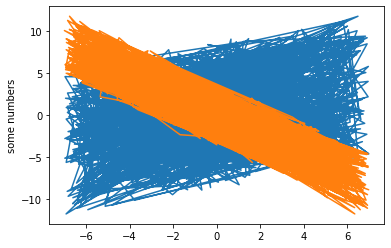

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X, Y)
plt.ylabel('some numbers')
plt.show()

In [ ]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

Реализуем функцию, вычисляющую вектор весов по нормальному уравнению линейной регрессии, и применим ее.

In [ ]:
def normal_equation(X, y):
    return np.linalg.solve((X.T).dot(X), (X.T).dot(y))

normal_eq_w = normal_equation(X, Y)
print(f'В случае использования нормального уравнения функционал ошибки составляет {round(mserror(X, normal_eq_w, Y), 4)}')

В случае использования нормального уравнения функционал ошибки составляет 0.2413


Обучим линейную регрессию путем градиентного спуска и получим графики изменения весов и ошибки

In [ ]:
# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(X, new_w, Y))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(X.shape, w.shape)

(1000, 2) (2,)


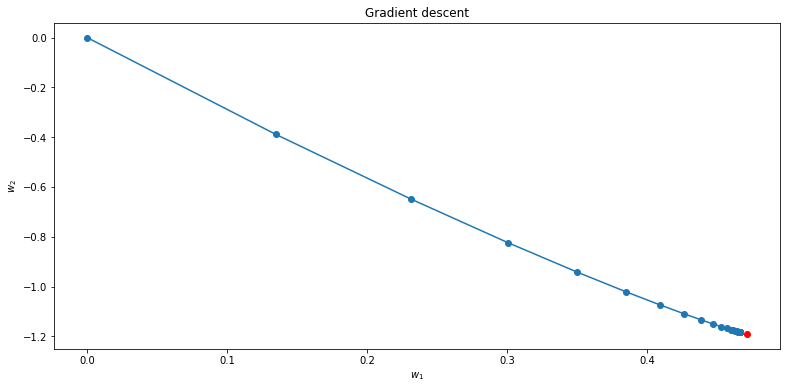

In [ ]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0], w_true[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

После каждой итерации значения искомых весов приближаются к истинным, однако, не становятся им равны из-за шума, добавленного в вектор ответов.

Text(0, 0.5, 'MSE')

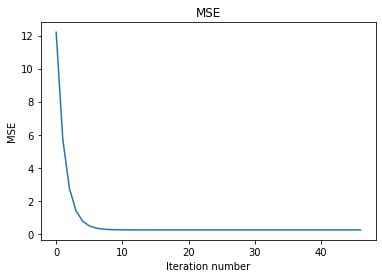

In [ ]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Видно, что изменение монотонно и начинается с высокой точки, после определенного количества итераций выходя на асимптоту.

Очень важно при использовании метода градиентного спуска правильно подбирать шаг. Если длина шага будет слишком мала, то метод будет слишком медленно приближаться к правильному ответу, и потребуется очень большое количество итераций для достижения сходимости. Если же длина наоборот будет слишком большой, появится вероятность "перепрыгивания" алгоритма через минимум функции или вообще отсутствия сходимости градиентного спуска.

Применяется методика использования переменного размера шага: на начальных этапах берется большой шаг, который с увеличением количества итераций снижается. Одна из таких методик - вычисление на каждой итерации размера шага по формуле

$$\eta_{k} = \frac{c}{k},$$

где $c$ - некоторая константа, а $k$ - номер шага.

## Дополнительные материалы

1. [Вывод аналитической формулы решения уравнения линейной регрессии](https://habr.com/ru/company/ods/blog/323890/#metod-naimenshih-kvadratov) (см. пункт 1.2)

## Литература

1. [Математическое описание метода градиентного спуска](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%81%D0%BF%D1%83%D1%81%D0%BA%D0%B0)
2. [Документация NumPy](https://docs.scipy.org/doc/numpy-1.16.0/reference/routines.html)